This program, we will take steps to answer our question of what features make movies top 100 movies of all time.
steps: 
Finding data -- web scrapping using Beautifulsoup,
Data quality analysis,
Data cleaning Analysis and presentation.

Questions to answer

1. Which movie has the most gross profit
2. Which director has directed the most movies
3. What year has the most movie produced (-- like 90s or etc)
4. Which movie has the most votes
5. 

In [1]:
#import all necessary pcks
import requests
import seaborn as sns
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

Step 1: Finding the data
Top 100 Greatest Movies of All Time a list complied on IMDB website 
by ChrisWalczyk55, created - 21 Dec 2012 | updated - 28 Mar 2017. 

source : -- https://www.imdb.com/list/ls055592025/'

In [2]:
#setting the base url -- the website with the info we need
baseurl = 'https://www.imdb.com/list/ls055592025/'

In [3]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'
}


r = requests.get(baseurl)
soup = BeautifulSoup(r.text, 'lxml')

In [4]:
#getting the div of all posts -- like containers that has all post
results = soup.find_all('div', class_='lister-item-content')

In [5]:
#finding out the number of post
len(results)

100

In [6]:
#now we get the first post -- and know all parts of it
movie_1 = results[0]
movie_1
print(movie_1.prettify())

<div class="lister-item-content">
 <h3 class="lister-item-header">
  <span class="lister-item-index unbold text-primary">
   1.
  </span>
  <a href="/title/tt0068646/">
   The Godfather
  </a>
  <span class="lister-item-year text-muted unbold">
   (1972)
  </span>
 </h3>
 <p class="text-muted text-small">
  <span class="certificate">
   18
  </span>
  <span class="ghost">
   |
  </span>
  <span class="runtime">
   175 min
  </span>
  <span class="ghost">
   |
  </span>
  <span class="genre">
   Crime, Drama
  </span>
 </p>
 <div class="ipl-rating-widget">
  <div class="ipl-rating-star small">
   <span class="ipl-rating-star__star">
    <svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
     <path d="M0 0h24v24H0z" fill="none">
     </path>
     <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z">
     </path>
     <path d="M0 0h24v24H0z" fill="none">
     </path

In [7]:
#getting the name of the movie
movie_1.find('a').text.strip()



'The Godfather'

In [8]:
#getting the chunk of the votes and gross
movie_1.contents[-4].text

'\nVotes:\n1,582,807\n| Gross:\n$134.97M\n'

In [9]:
#to get the gross part of the movie
movie_1.contents[-4].text[28:-1]

'134.97M'

In [10]:
#getting the votes
movie_1.contents[-4]('span')[1].text.strip().replace(',','')

'1582807'

In [11]:
#name of director 
movie_1.contents[-6]('a')[0].text.strip()


'Francis Ford Coppola'

In [12]:
#key stars -- we set a wide range cause we dont know the full range of stars listed
movie_1.find_all('a')[12:][0:20][1].text

'Marlon Brando'

In [13]:
movie_1.find_all('span', class_="ipl-rating-star__rating")[7].text

'3'

In [14]:
#year the movie was released
movie_1.find('span', class_='lister-item-year text-muted unbold').text.strip()

'(1972)'

In [15]:
from collections import Iterable
def iso(lis):
     for item in lis:
         if isinstance(item, Iterable) and not isinstance(item, str):
             for x in iso(item):
                 yield x
         else:        
             yield item

<ipython-input-15-c07aad88161f>:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Iterable


In [16]:
#putting all together
nameslis = [] #empty list to store our result
for result in results: #a for loop that will iterate through the url and get our defined datas 
    
    name = result.find('a').text.strip()
    year = result.find('span', class_='lister-item-year text-muted unbold').text[1:-1]
    duration = result.find('span',class_='runtime').text[0:-4]
    rating = result.find('span', class_="ipl-rating-star__rating").text.strip()
    genre = result.find('span', class_="genre").text.strip()
    metascore = result.find('span', class_="metascore favorable")
    url = result.find('p', class_="text-muted text-small").text
    gross = result.contents[-4].text[20:-1]
    votes = result.contents[-4]('span')[1].text.strip().replace(',','')
    director = result.contents[-6]('a')[0].text.strip()
    stars = list(iso(result.contents[-6]('a')[1:20]))
    
   #store them in a dict so it will be easy to put them all into our empty list 
    lister = {
        'movie_title':name,
        'genre':genre,
        'movie_year':year,
        'duration':duration,
        'rating':rating,
        'gross':gross,
        'votes':votes,
        'movie_dir':director,
        'stars':stars,
       
    }

    nameslis.append(lister) #storing our dict into empty list

In [17]:
#creating a dataframe with our scrapped data 
scrapped = pd.DataFrame(nameslis, index=range(1,101))
scrapped

,movie_title,genre,movie_year,duration,rating,gross,votes,movie_dir,stars
1,The Godfather,"Crime, Drama",1972,175,9.2,Gross:\n$134.97M,1582807,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
2,The Shawshank Redemption,Drama,1994,142,9.3,Gross:\n$28.34M,2293043,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
3,Schindler's List,"Biography, Drama, History",1993,195,8.9,Gross:\n$96.90M,1190394,Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Car..."
4,Raging Bull,"Biography, Drama, Sport",1980,129,8.2,oss:\n$23.38M,315835,Martin Scorsese,"[Robert De Niro, Cathy Moriarty, Joe Pesci, Fr..."
5,Casablanca,"Drama, Romance, War",1942,102,8.5,oss:\n$1.02M,513061,Michael Curtiz,"[Humphrey Bogart, Ingrid Bergman, Paul Henreid..."
...,...,...,...,...,...,...,...,...,...
96,Rear Window,"Mystery, Thriller",1954,112,8.4,oss:\n$36.76M,435422,Alfred Hitchcock,"[James Stewart, Grace Kelly, Wendell Corey, Th..."
97,The Third Man,"Film-Noir, Mystery, Thriller",1949,104,8.1,oss:\n$0.45M,156219,Carol Reed,"[Orson Welles, Joseph Cotten, Alida Valli, Tre..."
98,Rebel Without a Cause,Drama,1955,111,7.7,,82021,Nicholas Ray,"[James Dean, Natalie Wood, Sal Mineo, Jim Backus]"
99,North by Northwest,"Adventure, Mystery, Thriller",1959,136,8.3,oss:\n$13.28M,293760,Alfred Hitchcock,"[Cary Grant, Eva Marie Saint, James Mason, Jes..."


In [18]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('max_colwidth', None)

Step 2: Data Quality Assessment
- There is no widespread agreement for a definitive list of Data 
Quality Dimensions but most practitioners recognise 
the importance of 6 core dimensions:
    
1. Accuracy
2. Completeness
3. Uniqueness
4. Timeliness (often referred to as Currency)
5. Validity
6. Consistency

1. We can that the gross column data is inconsistent as it includes
strings & other characters (symbols)
RECOM: The column should be cleaned and the exact figure be extracted

2. Some of the rows has null values
RECOM: This missing values can be filled with mean of columns or be deleted


Step 3: Data Cleansing

In [19]:
scrapped

,movie_title,genre,movie_year,duration,rating,gross,votes,movie_dir,stars
1,The Godfather,"Crime, Drama",1972,175,9.2,Gross:\n$134.97M,1582807,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane Keaton]"
2,The Shawshank Redemption,Drama,1994,142,9.3,Gross:\n$28.34M,2293043,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler]"
3,Schindler's List,"Biography, Drama, History",1993,195,8.9,Gross:\n$96.90M,1190394,Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Caroline Goodall]"
4,Raging Bull,"Biography, Drama, Sport",1980,129,8.2,oss:\n$23.38M,315835,Martin Scorsese,"[Robert De Niro, Cathy Moriarty, Joe Pesci, Frank Vincent]"
5,Casablanca,"Drama, Romance, War",1942,102,8.5,oss:\n$1.02M,513061,Michael Curtiz,"[Humphrey Bogart, Ingrid Bergman, Paul Henreid, Claude Rains]"
6,Citizen Kane,"Drama, Mystery",1941,119,8.3,oss:\n$1.59M,391812,Orson Welles,"[Orson Welles, Joseph Cotten, Dorothy Comingore, Agnes Moorehead]"
7,Gone with the Wind,"Drama, History, Romance",1939,238,8.1,oss:\n$198.68M,285440,Victor Fleming,"[George Cukor, Sam Wood, Clark Gable, Vivien Leigh, Thomas Mitchell, Barbara O'Neil]"
8,The Wizard of Oz,"Adventure, Family, Fantasy",1939,102,8,oss:\n$2.08M,367369,Victor Fleming,"[George Cukor, Mervyn LeRoy, Norman Taurog, Richard Thorpe, King Vidor, Judy Garland, Frank Morgan, Ray Bolger, Bert Lahr]"
9,One Flew Over the Cuckoo's Nest,Drama,1975,133,8.7,oss:\n$112.00M,899656,Milos Forman,"[Jack Nicholson, Louise Fletcher, Michael Berryman, Peter Brocco]"
10,Lawrence of Arabia,"Adventure, Biography, Drama",1962,228,8.3,oss:\n$44.82M,263211,David Lean,"[Peter O'Toole, Alec Guinness, Anthony Quinn, Jack Hawkins]"


first we gross up the gross column -- well we will clean it by getting our desired characters and add
it to a new column


In [20]:
#method 1-- cleaning and using it to create another column
#j = scrapped.gross.str.split('\n', 1).str[1].str.strip()
#scrapped['movie_gross'] = j


In [21]:
#method 2
scrapped.gross = scrapped.gross.str.split('\n', 1).str[1].str.strip()

In [22]:
scrapped.head()

,movie_title,genre,movie_year,duration,rating,gross,votes,movie_dir,stars
1,The Godfather,"Crime, Drama",1972,175,9.2,$134.97M,1582807,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane Keaton]"
2,The Shawshank Redemption,Drama,1994,142,9.3,$28.34M,2293043,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler]"
3,Schindler's List,"Biography, Drama, History",1993,195,8.9,$96.90M,1190394,Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Caroline Goodall]"
4,Raging Bull,"Biography, Drama, Sport",1980,129,8.2,$23.38M,315835,Martin Scorsese,"[Robert De Niro, Cathy Moriarty, Joe Pesci, Frank Vincent]"
5,Casablanca,"Drama, Romance, War",1942,102,8.5,$1.02M,513061,Michael Curtiz,"[Humphrey Bogart, Ingrid Bergman, Paul Henreid, Claude Rains]"


In [23]:
#str = "h3110 23 cat 444.4 rabbit 11 2 dog"
#[int(s) for s in str.split() if s.isdigit()]

In [24]:
scrapped.gross = scrapped.gross.str.replace('M','').str.replace('$','')
scrapped.head()

,movie_title,genre,movie_year,duration,rating,gross,votes,movie_dir,stars
1,The Godfather,"Crime, Drama",1972,175,9.2,134.97,1582807,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane Keaton]"
2,The Shawshank Redemption,Drama,1994,142,9.3,28.34,2293043,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler]"
3,Schindler's List,"Biography, Drama, History",1993,195,8.9,96.90,1190394,Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Caroline Goodall]"
4,Raging Bull,"Biography, Drama, Sport",1980,129,8.2,23.38,315835,Martin Scorsese,"[Robert De Niro, Cathy Moriarty, Joe Pesci, Frank Vincent]"
5,Casablanca,"Drama, Romance, War",1942,102,8.5,1.02,513061,Michael Curtiz,"[Humphrey Bogart, Ingrid Bergman, Paul Henreid, Claude Rains]"


In [25]:
scrapped.describe()

,movie_title,genre,movie_year,duration,rating,gross,votes,movie_dir,stars
count,100,100,100,100,100,88,100,100,100
unique,100,60,61,64,20,86,100,58,100
top,The Green Mile,Drama,1939,129,8,4.36,1211275,Steven Spielberg,"[Charlie Sheen, Tom Berenger, Willem Dafoe, Keith David]"
freq,1,7,5,4,15,2,1,7,1


In [26]:
#understand the dataset
scrapped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_title  100 non-null    object
 1   genre        100 non-null    object
 2   movie_year   100 non-null    object
 3   duration     100 non-null    object
 4   rating       100 non-null    object
 5   gross        88 non-null     object
 6   votes        100 non-null    object
 7   movie_dir    100 non-null    object
 8   stars        100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


In [27]:
scrapped.columns

Index(['movie_title', 'genre', 'movie_year', 'duration', 'rating', 'gross',
       'votes', 'movie_dir', 'stars'],
      dtype='object')

In [28]:
scrapped[['movie_year','duration','rating','gross','votes']] = scrapped[['movie_year','duration','rating','gross','votes']].astype(float)

In [29]:
scrapped.dtypes

movie_title     object
genre           object
movie_year     float64
duration       float64
rating         float64
gross          float64
votes          float64
movie_dir       object
stars           object
dtype: object

In [30]:
scrapped.describe()

,movie_year,duration,rating,gross,votes
count,100.000000,100.000000,100.000000,88.000000,1.000000e+02
mean,1966.220000,135.290000,8.162000,86.816250,4.375194e+05
std,19.354523,32.724838,0.399439,115.694313,4.674627e+05
min,1930.000000,85.000000,7.200000,0.020000,1.392600e+04
25%,1951.000000,111.750000,7.900000,9.292500,9.723150e+04
50%,1965.500000,126.000000,8.100000,44.225000,2.569955e+05
75%,1979.250000,153.250000,8.400000,115.560000,5.971890e+05
max,2003.000000,238.000000,9.300000,659.330000,2.293043e+06


In [31]:
scrapped.isna().sum()

movie_title     0
genre           0
movie_year      0
duration        0
rating          0
gross          12
votes           0
movie_dir       0
stars           0
dtype: int64

In [32]:
#lets returned all nan values
scrapped[scrapped.isna().any(axis=1)]

,movie_title,genre,movie_year,duration,rating,gross,votes,movie_dir,stars
15,Sunset Blvd.,"Drama, Film-Noir",1950.0,110.0,8.4,NaN,197468.0,Billy Wilder,"[William Holden, Gloria Swanson, Erich von Stroheim, Nancy Olson]"
27,It's a Wonderful Life,"Drama, Family, Fantasy",1946.0,130.0,8.6,NaN,390471.0,Frank Capra,"[James Stewart, Donna Reed, Lionel Barrymore, Thomas Mitchell]"
42,The Philadelphia Story,"Comedy, Romance",1940.0,112.0,7.9,NaN,62410.0,George Cukor,"[Cary Grant, Katharine Hepburn, James Stewart, Ruth Hussey]"
43,To Kill a Mockingbird,"Crime, Drama",1962.0,129.0,8.2,NaN,290138.0,Robert Mulligan,"[Gregory Peck, John Megna, Frank Overton, Rosemary Murphy]"
49,The Searchers,"Adventure, Drama, Western",1956.0,119.0,7.9,NaN,78935.0,John Ford,"[John Wayne, Jeffrey Hunter, Vera Miles, Ward Bond]"
66,Bonnie and Clyde,"Action, Biography, Crime",1967.0,111.0,7.8,NaN,100701.0,Arthur Penn,"[Warren Beatty, Faye Dunaway, Michael J. Pollard, Gene Hackman]"
70,A Place in the Sun,"Drama, Romance",1951.0,122.0,7.8,NaN,19741.0,George Stevens,"[Montgomery Clift, Elizabeth Taylor, Shelley Winters, Anne Revere]"
76,Giant,"Drama, Western",1956.0,201.0,7.6,NaN,33456.0,George Stevens,"[Elizabeth Taylor, Rock Hudson, James Dean, Carroll Baker]"
82,Network,Drama,1976.0,121.0,8.1,NaN,142693.0,Sidney Lumet,"[Faye Dunaway, William Holden, Peter Finch, Robert Duvall]"
89,Stagecoach,"Adventure, Drama, Western",1939.0,96.0,7.8,NaN,42611.0,John Ford,"[John Wayne, Claire Trevor, Andy Devine, John Carradine]"


In [33]:
scrapped.head()

,movie_title,genre,movie_year,duration,rating,gross,votes,movie_dir,stars
1,The Godfather,"Crime, Drama",1972.0,175.0,9.2,134.97,1582807.0,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane Keaton]"
2,The Shawshank Redemption,Drama,1994.0,142.0,9.3,28.34,2293043.0,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler]"
3,Schindler's List,"Biography, Drama, History",1993.0,195.0,8.9,96.90,1190394.0,Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Caroline Goodall]"
4,Raging Bull,"Biography, Drama, Sport",1980.0,129.0,8.2,23.38,315835.0,Martin Scorsese,"[Robert De Niro, Cathy Moriarty, Joe Pesci, Frank Vincent]"
5,Casablanca,"Drama, Romance, War",1942.0,102.0,8.5,1.02,513061.0,Michael Curtiz,"[Humphrey Bogart, Ingrid Bergman, Paul Henreid, Claude Rains]"


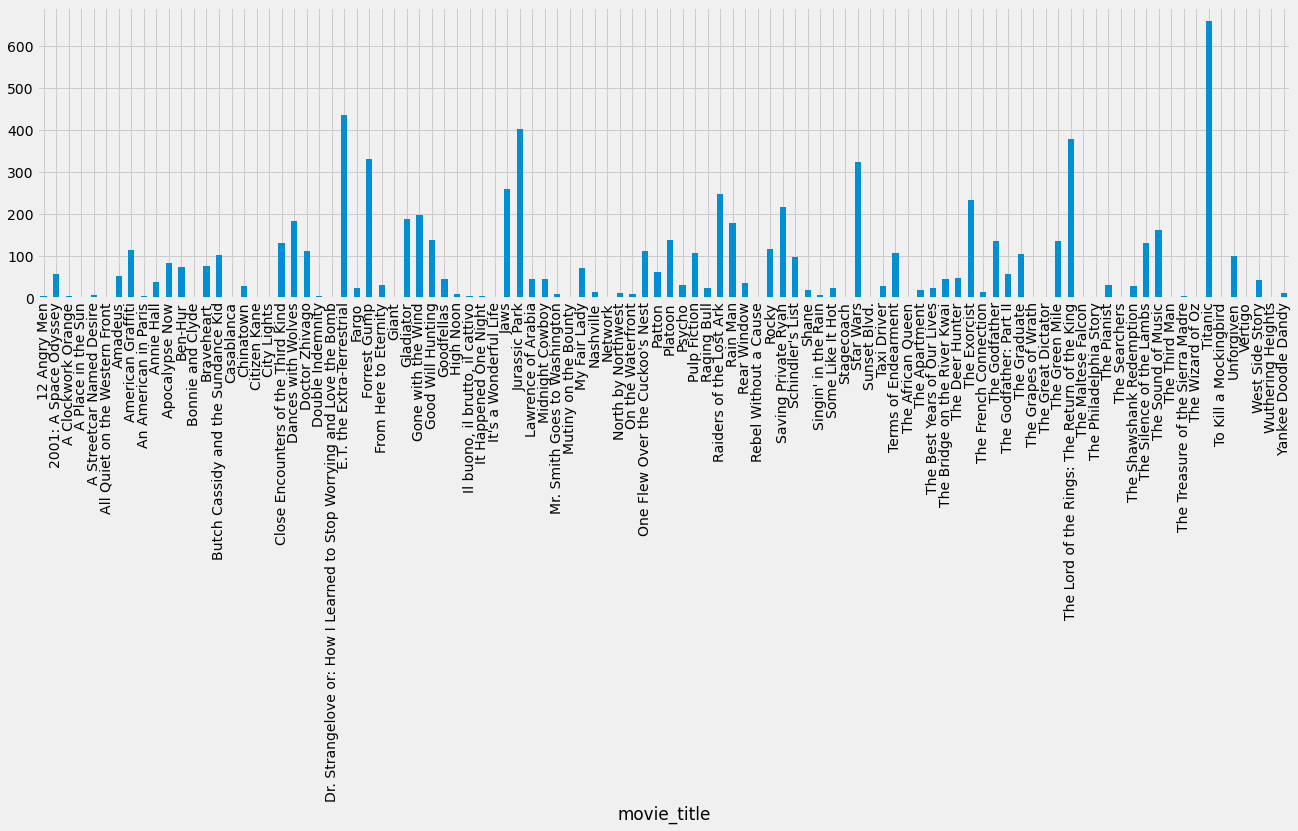

In [34]:
#QUE 1 -- MOVIE WITH MOST GROSS GENERATED
plt.style.use("fivethirtyeight")
scrapped.groupby(['movie_title']).sum()['gross'].plot(kind='bar',figsize=(20,5))
plt.show()

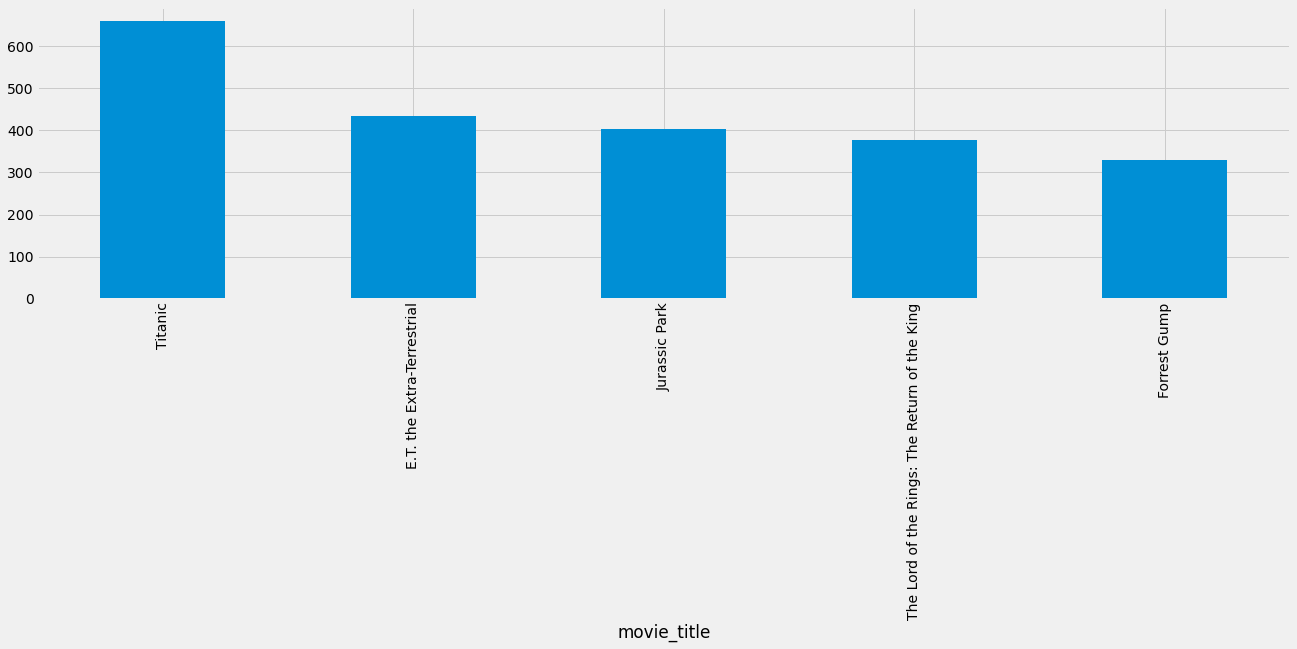

In [35]:
scrapped.groupby(['movie_title']).sum()['gross'].nlargest(5).plot(kind='bar',figsize=(20,5))
plt.show()

In [36]:
#to confirm the plot
scrapped.nlargest(6,'gross')

,movie_title,genre,movie_year,duration,rating,gross,votes,movie_dir,stars
35,Titanic,"Drama, Romance",1997.0,194.0,7.8,659.33,1027894.0,James Cameron,"[Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates]"
22,E.T. the Extra-Terrestrial,"Family, Sci-Fi",1982.0,115.0,7.8,435.11,364841.0,Steven Spielberg,"[Henry Thomas, Drew Barrymore, Peter Coyote, Dee Wallace]"
60,Jurassic Park,"Action, Adventure, Sci-Fi",1993.0,127.0,8.1,402.45,851280.0,Steven Spielberg,"[Sam Neill, Laura Dern, Jeff Goldblum, Richard Attenborough]"
33,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",2003.0,201.0,8.9,377.85,1612731.0,Peter Jackson,"[Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom]"
16,Forrest Gump,"Drama, Romance",1994.0,142.0,8.8,330.25,1767071.0,Robert Zemeckis,"[Tom Hanks, Robin Wright, Gary Sinise, Sally Field]"
20,Star Wars,"Action, Adventure, Fantasy",1977.0,121.0,8.6,322.74,1209888.0,George Lucas,"[Mark Hamill, Harrison Ford, Carrie Fisher, Alec Guinness]"


In [37]:
#who has the highest gross
scrapped.loc[scrapped.gross.idxmax()]

movie_title                                                       Titanic
genre                                                      Drama, Romance
movie_year                                                           1997
duration                                                              194
rating                                                                7.8
gross                                                              659.33
votes                                                         1.02789e+06
movie_dir                                                   James Cameron
stars          [Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates]
Name: 35, dtype: object

In [38]:
#which director directed the most movies
scrapped.movie_dir.value_counts()

Steven Spielberg         7
Alfred Hitchcock         4
Billy Wilder             4
Stanley Kubrick          3
George Stevens           3
Francis Ford Coppola     3
Frank Capra              3
Martin Scorsese          3
John Ford                3
David Lean               3
John Huston              3
William Wyler            3
Sidney Lumet             2
Charles Chaplin          2
George Lucas             2
Milos Forman             2
Victor Fleming           2
Frank Darabont           2
Fred Zinnemann           2
Michael Curtiz           2
Elia Kazan               2
George Cukor             2
William Friedkin         2
Roman Polanski           2
John G. Avildsen         1
Mel Gibson               1
Ridley Scott             1
Nicholas Ray             1
Barry Levinson           1
Robert Mulligan          1
Franklin J. Schaffner    1
Lewis Milestone          1
Carol Reed               1
Oliver Stone             1
Arthur Penn              1
George Roy Hill          1
Joel Coen                1
J

In [39]:
#see the movies directed
moviedirected = scrapped[scrapped.movie_dir == 'Steven Spielberg']
moviedirected

,movie_title,genre,movie_year,duration,rating,gross,votes,movie_dir,stars
3,Schindler's List,"Biography, Drama, History",1993.0,195.0,8.9,96.90,1190394.0,Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Caroline Goodall]"
22,E.T. the Extra-Terrestrial,"Family, Sci-Fi",1982.0,115.0,7.8,435.11,364841.0,Steven Spielberg,"[Henry Thomas, Drew Barrymore, Peter Coyote, Dee Wallace]"
37,Saving Private Ryan,"Drama, War",1998.0,169.0,8.6,216.54,1211275.0,Steven Spielberg,"[Tom Hanks, Matt Damon, Tom Sizemore, Edward Burns]"
39,Raiders of the Lost Ark,"Action, Adventure",1981.0,115.0,8.4,248.16,869749.0,Steven Spielberg,"[Harrison Ford, Karen Allen, Paul Freeman, John Rhys-Davies]"
50,Jaws,"Adventure, Thriller",1975.0,124.0,8.0,260.00,537631.0,Steven Spielberg,"[Roy Scheider, Robert Shaw, Richard Dreyfuss, Lorraine Gary]"
60,Jurassic Park,"Action, Adventure, Sci-Fi",1993.0,127.0,8.1,402.45,851280.0,Steven Spielberg,"[Sam Neill, Laura Dern, Jeff Goldblum, Richard Attenborough]"
80,Close Encounters of the Third Kind,"Drama, Sci-Fi",1977.0,138.0,7.6,132.09,181589.0,Steven Spielberg,"[Richard Dreyfuss, François Truffaut, Teri Garr, Melinda Dillon]"


In [40]:
#which has the most votes and gross -- of all his movies
moviedirected.sort_values(by=['votes', 'gross'],ascending=False)

,movie_title,genre,movie_year,duration,rating,gross,votes,movie_dir,stars
37,Saving Private Ryan,"Drama, War",1998.0,169.0,8.6,216.54,1211275.0,Steven Spielberg,"[Tom Hanks, Matt Damon, Tom Sizemore, Edward Burns]"
3,Schindler's List,"Biography, Drama, History",1993.0,195.0,8.9,96.90,1190394.0,Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Caroline Goodall]"
39,Raiders of the Lost Ark,"Action, Adventure",1981.0,115.0,8.4,248.16,869749.0,Steven Spielberg,"[Harrison Ford, Karen Allen, Paul Freeman, John Rhys-Davies]"
60,Jurassic Park,"Action, Adventure, Sci-Fi",1993.0,127.0,8.1,402.45,851280.0,Steven Spielberg,"[Sam Neill, Laura Dern, Jeff Goldblum, Richard Attenborough]"
50,Jaws,"Adventure, Thriller",1975.0,124.0,8.0,260.00,537631.0,Steven Spielberg,"[Roy Scheider, Robert Shaw, Richard Dreyfuss, Lorraine Gary]"
22,E.T. the Extra-Terrestrial,"Family, Sci-Fi",1982.0,115.0,7.8,435.11,364841.0,Steven Spielberg,"[Henry Thomas, Drew Barrymore, Peter Coyote, Dee Wallace]"
80,Close Encounters of the Third Kind,"Drama, Sci-Fi",1977.0,138.0,7.6,132.09,181589.0,Steven Spielberg,"[Richard Dreyfuss, François Truffaut, Teri Garr, Melinda Dillon]"


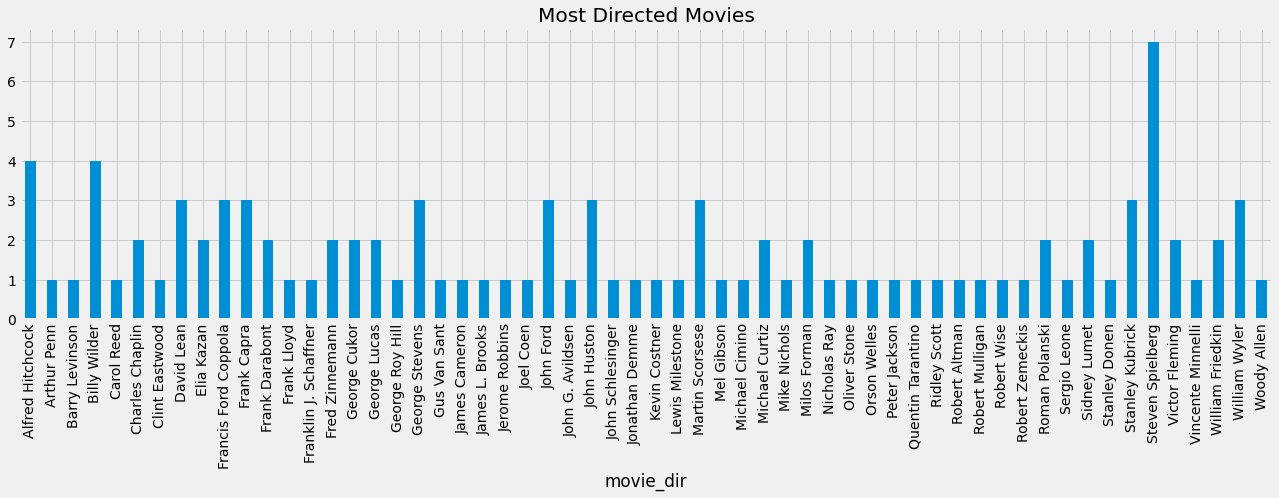

In [41]:
#showing the number of movies directed by directors
scrapped.groupby(by='movie_dir')['movie_title'].agg('count').plot(kind='bar',figsize=(20,5), title='Most Directed Movies')

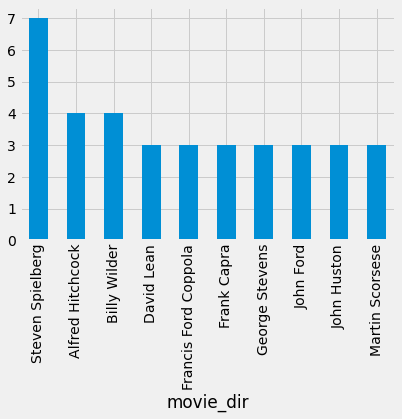

In [42]:
#show top 10
scrapped.groupby(by='movie_dir')['movie_title'].agg('count').nlargest(10).plot(kind='bar')

In [43]:
#groupped_data = df.groupby(['week', 'day']).agg({'sales': 'sum'})
#groupped_data.cumsum()
#scrapped.genre.str.count('Drama').sum(), scrapped.genre.str.count('Action').sum()

In [44]:
scrapped.rating.max(), scrapped.rating.min()

(9.3, 7.2)

In [45]:
labels = ['Less than 5.9','6-6.9','7-7.9','8-8.9', '9 and more']
bins = [5,6,7,8,9,10]
freq_dist = scrapped.groupby(pd.cut(scrapped['rating'],bins=bins, labels=labels)).size()
freq_dist

rating
Less than 5.9     0
6-6.9             0
7-7.9            41
8-8.9            57
9 and more        2
dtype: int64

In [46]:
freq_dist = freq_dist.reset_index(name='count')
freq_dist

,rating,count
0,Less than 5.9,0
1,6-6.9,0
2,7-7.9,41
3,8-8.9,57
4,9 and more,2
